## 날짜별 워드 클라우드로 가장 빈도수 높은 단어 도출 (title)
- 이예빈
- 참고: 
    - 불용어 리스트 (https://www.ranks.nl/stopwords/korean)
    - 불용어 리스트(https://gist.github.com/spikeekips/40eea22ef4a89f629abd87eed535ac6a)

In [4]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tqdm

In [5]:
try:
    if not(os.path.isdir('../data/tokenized_news')):
        os.makedirs(os.path.join('./tokenized_news'))
                    
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!")
        raise

In [6]:
# CSV_List로 만드는 함수
def csv2list(filename):
    lists = []
    file = open(filename,'r',encoding='utf-8')
    while True:
        line = file.readline().rstrip('\n')
        if line:
            lists.append(line)
        else:
            break
    return lists

In [7]:
stop_words = csv2list('../data/stop_words/stop_words.csv')

In [23]:
### 뉴스 제목에서 기호 제거 & 명사 추출 

def textile_preprocessing(text, okt):
    textile_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', ' ', text)
    word_textile = okt.nouns(textile_text) 
    word_textile = [word for word in word_textile if not word in stop_words] # 불용어 제거
    
    return word_textile

In [29]:
### 전처리된 데이터프레임 by_day를 반환합니다. 
## file: csv파일이 들어있는 경로를 지정해주세요. (+ 파일까지 포함되도록!)

def all_preprocessing(file):
    df_file = pd.read_csv(file, encoding='utf-8')
    
    textile = df_file['text']
    date_ = df_file['date']
    df_ = pd.DataFrame({'text':textile, 'date':date_})
    
    okt = Okt()
    clean_text = []
    for text in df_['text']:
        if type(text)==str:
            clean_text.append(textile_preprocessing(text, okt))
        else:
            clean_text.append([])
    df_['text'] = clean_text
    
    # date 컬럼 -> datetime으로 설정 
    df_['date'] = pd.to_datetime(df_['date'])
    by_day = df_file.groupby(df_['date']).sum()

    # 딕셔너리 풀기
    title_textile = []
    for i in range(len(by_day['text'])):
        title_textile.append(', '.join(by_day['text'][i]))

    by_day['text'] = title_textile
    
    by_day.to_csv('../data/tokenized_news/tokenized_news_textile_okt_nouns_eng' , encoding='utf-8')
    
    return by_day

In [30]:
all_preprocessing('./1-8월 뉴스.csv')

,title,text,url,media,date
date,,,,,
2020-01-01,무너지는 일과 삶의 경계···노동이 녹아내린다일자리 아닌 일거리···'일정치 않음'...,"이, , 땅, 에, 서, , ‘, 비, 정, 규, 직, ’, 이, 라, 는, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문경향신문경향신문국민일보국민일보국민일보국민일보국민일보국민일보국민일보동아...,2020-01-012020-01-012020-01-012020-01-012020-0...
2020-01-02,김정은 “머지않아 새 전략무기 목격하게 될 것” [북 노동당 전원회의 결정서]작년 ...,"ㆍ, 북, , 노, 동, 당, , 중, 앙, 위, , 전, 원, 회, 의, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문국민일보국민...,2020-01-022020-01-022020-01-022020-01-022020-0...
2020-01-03,"엽서·쿡방·팬시·팬덤…밀레니얼의 ‘5·18 기억법’외교부 ""이라크 정세 불안과 한국...","ㆍ, 5, ·, 1, 8, 민, 주, 화, 운, 동, , 4, 0, 주, 기, …...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향...,2020-01-032020-01-032020-01-032020-01-032020-0...
2020-01-04,‘썩은 계란의 피라미드’를 깨다 [커버스토리]미 공습에 이란혁명수비대 ‘실세’ 사망...,"ㆍ, 고, 은, 과, 의, , ‘, 미, 투, , 소, 송, ’, 에, 서, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문국민일보국민일보국민...,2020-01-042020-01-042020-01-042020-01-042020-0...
2020-01-05,"1월6일 서울, 세계 최악의 도시 3위? [오래 전 ‘이날’](5)새해에만 굳건한 ...","1, 9, 6, 0, 년, 부, 터, , 2, 0, 1, 0, 년, 까, 지, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문,2020-01-052020-01-05
...,...,...,...,...,...
2020-08-27,업무개시명령에도 의료계 총파업 강행또 트럼프가 되는 걸까? …11월 미국 대선 세가...,"[, 경, 향, 신, 문, ], , \n, \n, 대, 한, 의, 사, 협, 회,...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향...,2020-08-272020-08-272020-08-272020-08-272020-0...
2020-08-28,거리 두기 2단계에도 꺾이지 않는 코로나 재확산의·정 대화 단절 속…응급·중환자실 ...,"[, 경, 향, 신, 문, ], , \n, \n, \n, \n, 장, 기, 화, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향...,2020-08-282020-08-282020-08-282020-08-282020-0...
2020-08-29,의사 파업 속…의정부·부산서 응급실 찾아 헤매던 환자 숨져‘지병 악화’ 아베 일본 ...,"[, 경, 향, 신, 문, ], , \n, \n, \n, \n, 의, 사, 들, ...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향신문경향...,2020-08-292020-08-292020-08-292020-08-292020-0...


In [ ]:
tmp_df.to_csv('./tokenized_news/tokenized_title_okt_nouns', encoding='utf-8')

In [32]:
aa = pd.read_csv('./1-8월 뉴스.csv')

In [ ]:
okt = Okt()
clean_text = []
for text in aa['text']:
    if type(text)==str:
        
        textile_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', ' ', text)
        word_textile = okt.nouns(textile_text) 
        word_textile = [word for word in word_textile if not word in stop_words] # 불용어 제거
        
        clean_text.append(word_textile)
    else:
         clean_text.append([])
    
aa['text'] = clean_text

In [18]:
def daily_news_text_wordcloud(date_to_search):
    tmp_df = pd.read_csv('../data/tokenized_news/tokenized_news_textile_okt_nouns_eng', encoding='UTF-8')
    
    cloud = WordCloud(
      font_path='../../fonts/NanumSquareRoundR.ttf'
    , width=800
    , height=600
    , max_words=100
    ).generate(
        ''.join(tmp_df['text'][tmp_df['date']== date_to_search])
    )

    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off')

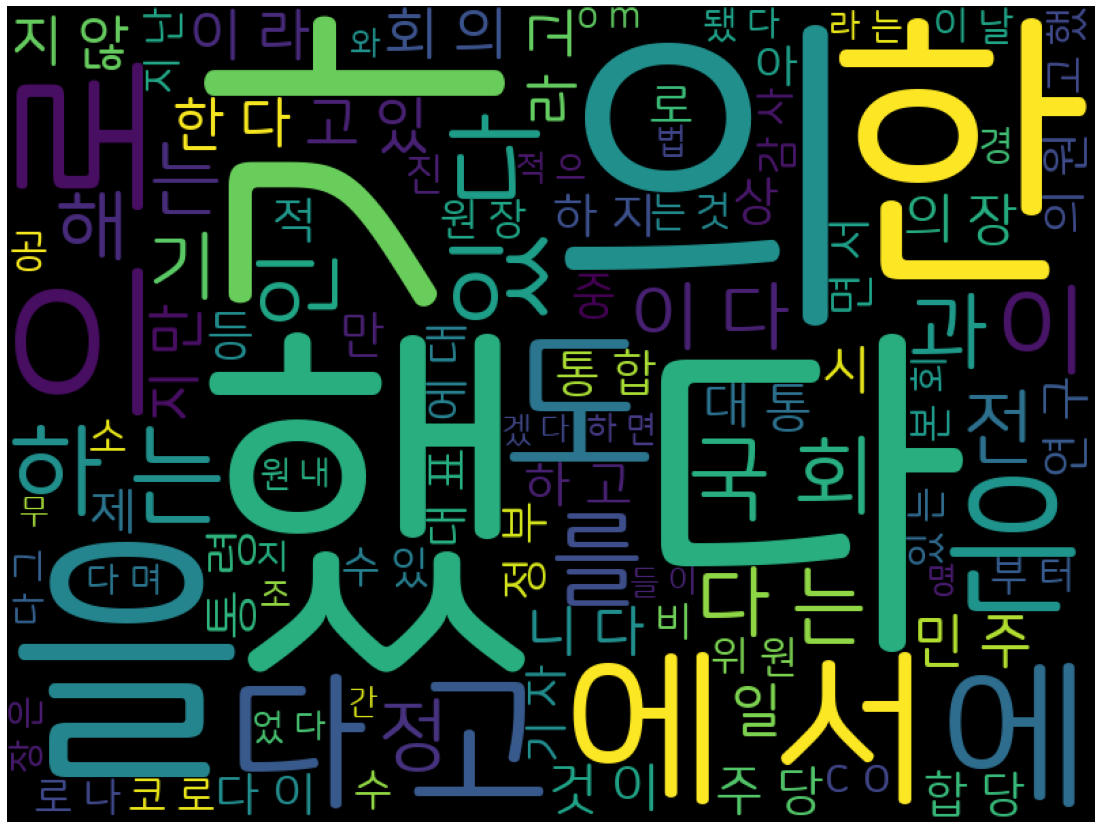

In [19]:
daily_news_text_wordcloud('2020-06-06')